# ✍🏻 데이터 로드

##  library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

from tqdm.notebook import tqdm
plt.style.use('seaborn')
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
from tqdm.notebook import tqdm

## 2️⃣ Dataset Load

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# ✍🏻 Basic EDA

## 1️⃣ 기본정보

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 2️⃣ 결측치 확인

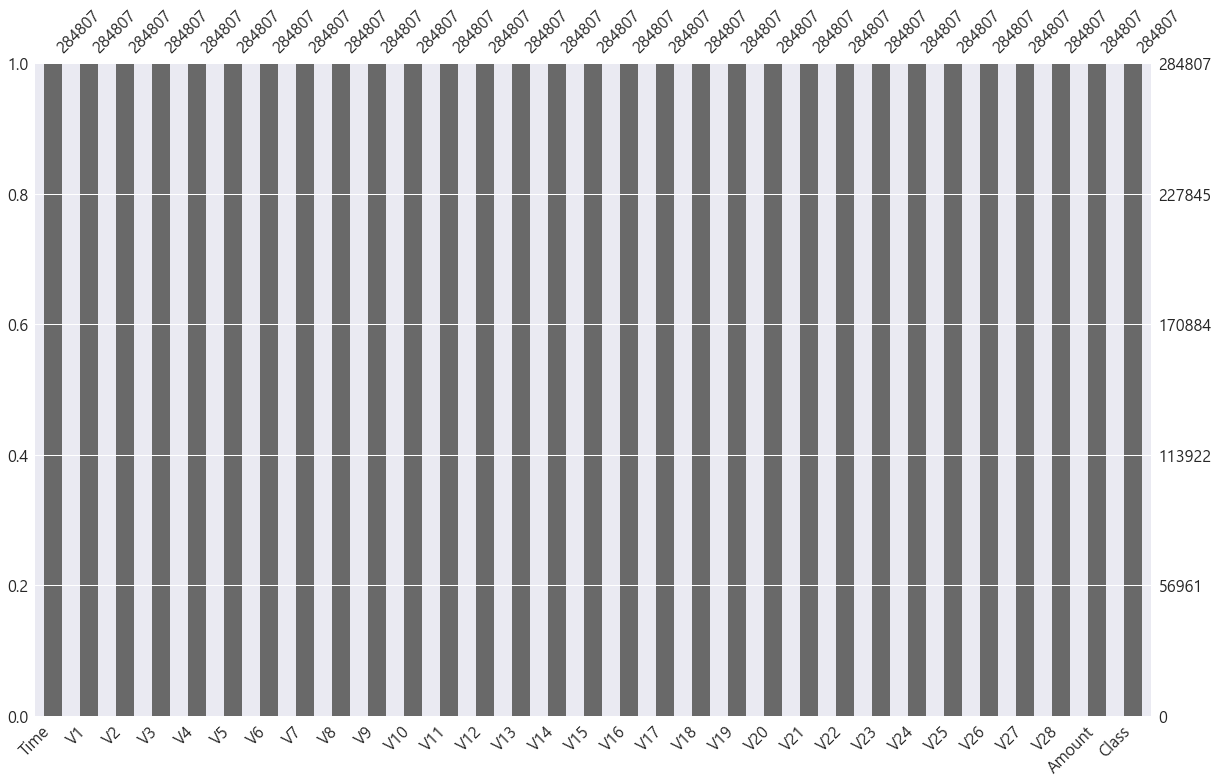

총 결측치 개수: 0


In [5]:
msno.bar(df=df,figsize=(20,12))
plt.show()
print('총 결측치 개수:', df.isna().sum().sum())

## 3️⃣ 시간에 따른 거래량

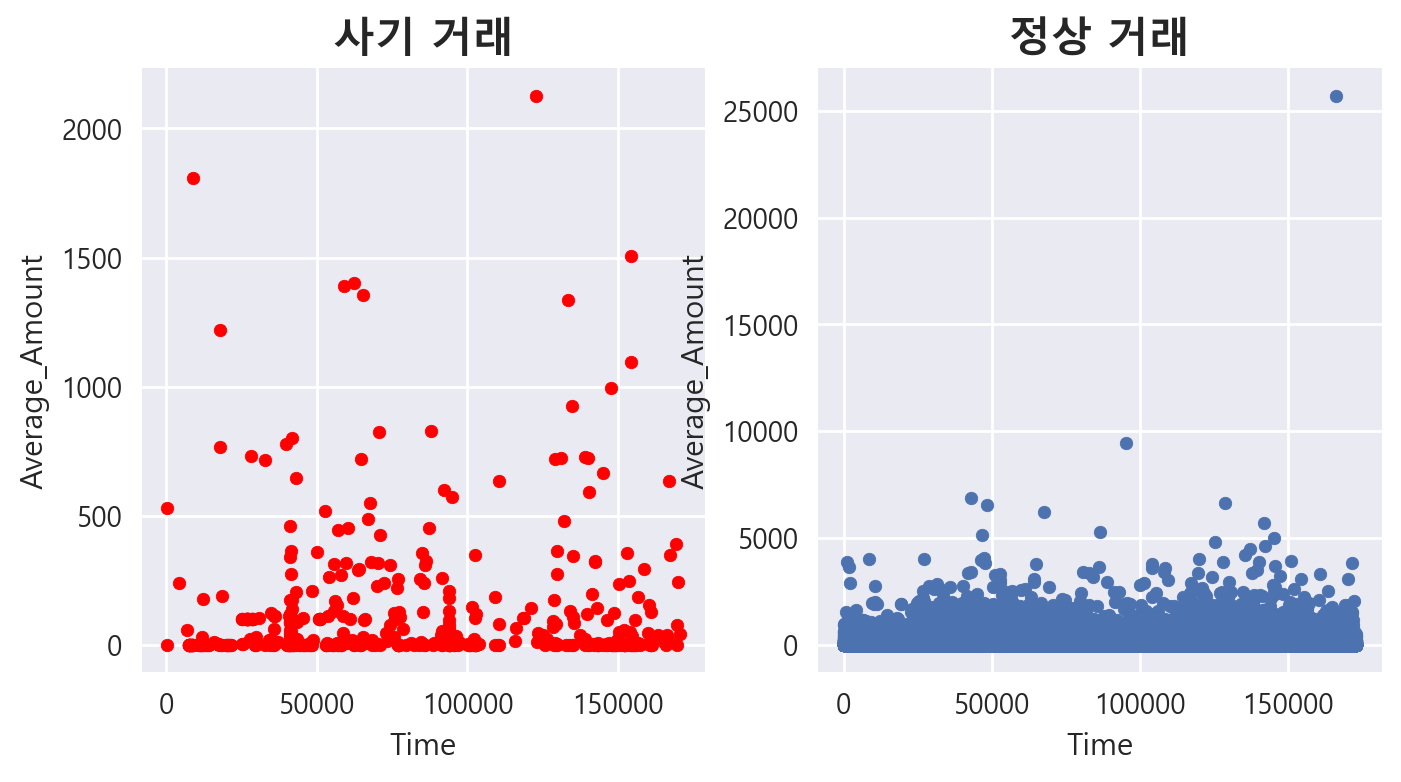

In [6]:
df_bytime_class_mean = df.groupby(['Time', 'Class'])[['Amount']].mean()
df_bytime_class_mean.columns = ['Average_Amount']
df_bytime_class_mean.reset_index(drop=False, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
for i, ax in enumerate(ax.flatten()): 
    if i==0:
        df_bytime_class_mean.query('Class==1').plot.scatter(x='Time', y='Average_Amount', ax=ax, color='r')
        ax.set_title('사기 거래', fontweight='bold', fontsize=15)
    else:
        df_bytime_class_mean.query('Class==0').plot.scatter(x='Time', y='Average_Amount', ax=ax)
        ax.set_title('정상 거래', fontweight='bold', fontsize=15)
plt.show()

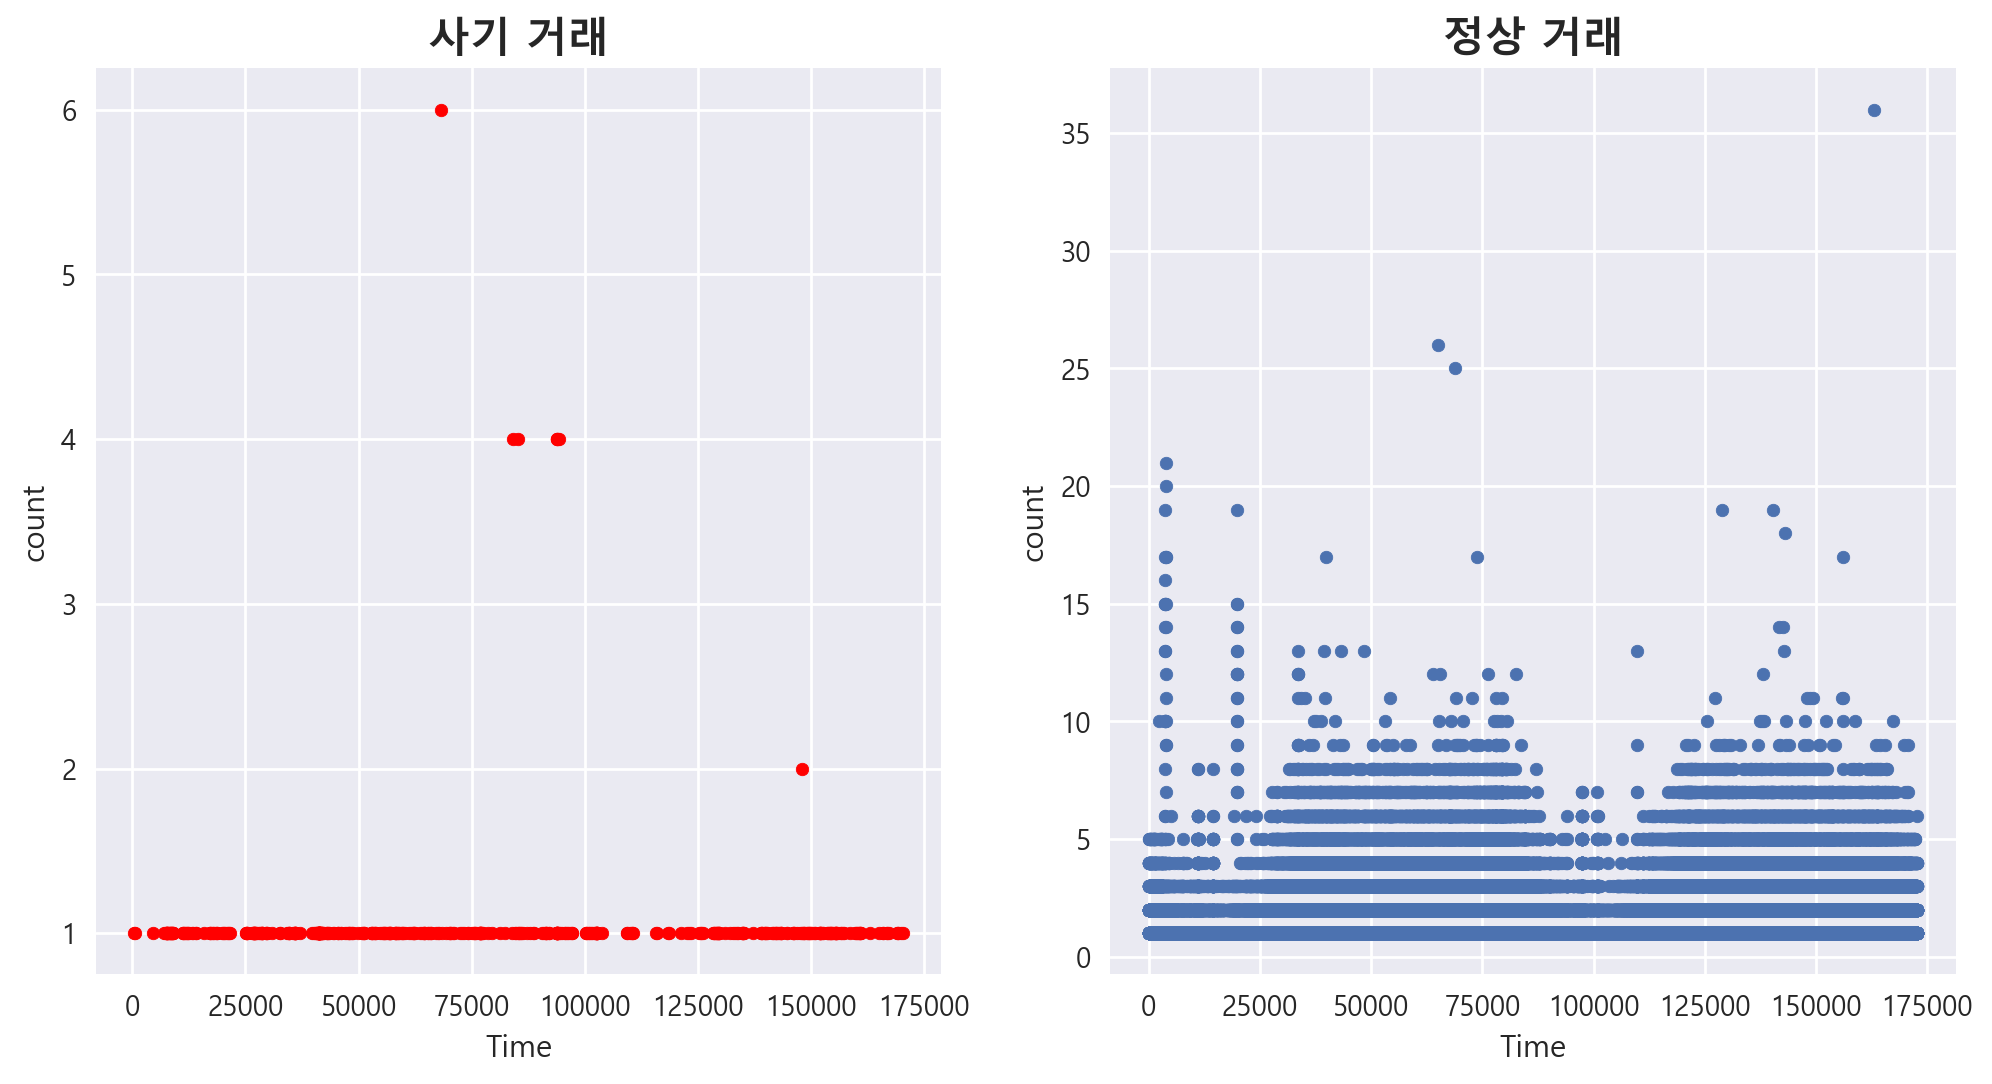

In [7]:
df_bytime_class_count = df.groupby(['Time', 'Class'])[['Amount']].count()
df_bytime_class_count.columns = ['count']
df_bytime_class_count.reset_index(drop=False, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200)
for i, ax in enumerate(ax.flatten()): 
    if i==0:
        df_bytime_class_count.query('Class==1').plot.scatter(x='Time', y='count', ax=ax, color='r')
        ax.set_title('사기 거래', fontweight='bold', fontsize=15)
    else:
        df_bytime_class_count.query('Class==0').plot.scatter(x='Time', y='count', ax=ax)
        ax.set_title('정상 거래', fontweight='bold', fontsize=15)
plt.show()


## 4️⃣ class 분포

* 사기거래 class가 극도로 적음

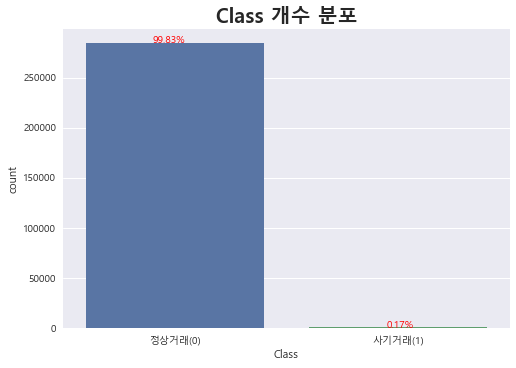

In [8]:
class_counts = df['Class'].value_counts()
count_percent = (class_counts/class_counts.sum()* 100).round(2)

sns.countplot(data=df, x='Class')
plt.text(0-0.1, class_counts[0], f'{count_percent[0]}%',color='red')
plt.text(1-0.05, class_counts[1], f'{count_percent[1]}%',color='red')
plt.title('Class 개수 분포', fontsize=20, fontweight='bold')
plt.xticks([0, 1] ,['정상거래(0)','사기거래(1)'])
plt.show()

### oversampling

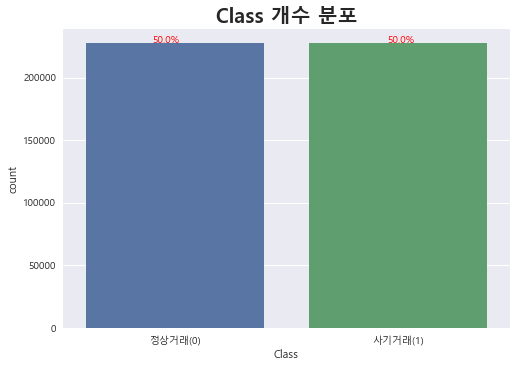

In [9]:
x_data, y_data = df.drop('Class', axis=1, inplace=False), df['Class']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=1)

smote = SMOTE(random_state=1)
x_train_o, y_train_o = smote.fit_resample(x_train, y_train)

train_o= x_train_o.copy()
train_o['Class'] = y_train_o

class_counts = train_o['Class'].value_counts()
count_percent = (class_counts/class_counts.sum()* 100).round(2)

sns.countplot(data=train_o, x='Class')
plt.text(0-0.1, class_counts[0], f'{count_percent[0]}%',color='red')
plt.text(1-0.05, class_counts[1], f'{count_percent[1]}%',color='red')
plt.title('Class 개수 분포', fontsize=20, fontweight='bold')
plt.xticks([0, 1] ,['정상거래(0)','사기거래(1)'])
plt.show()

### undersampling

## 5️⃣ 상관관계

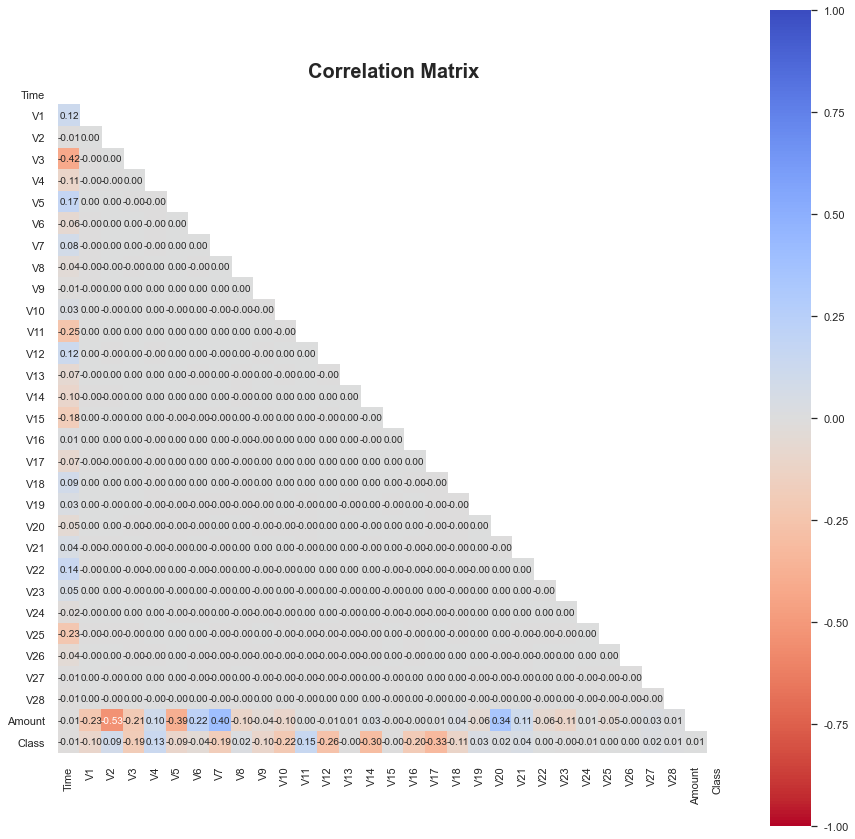

In [10]:
corr = df.corr()
sns.set(style='white')
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, mask=mask, cmap='coolwarm_r',vmin=-1, vmax=1,
            square=True, annot=True, fmt='.2f',  annot_kws={"size":10})
plt.title('Correlation Matrix', fontsize=20,  fontweight='bold')
plt.show()

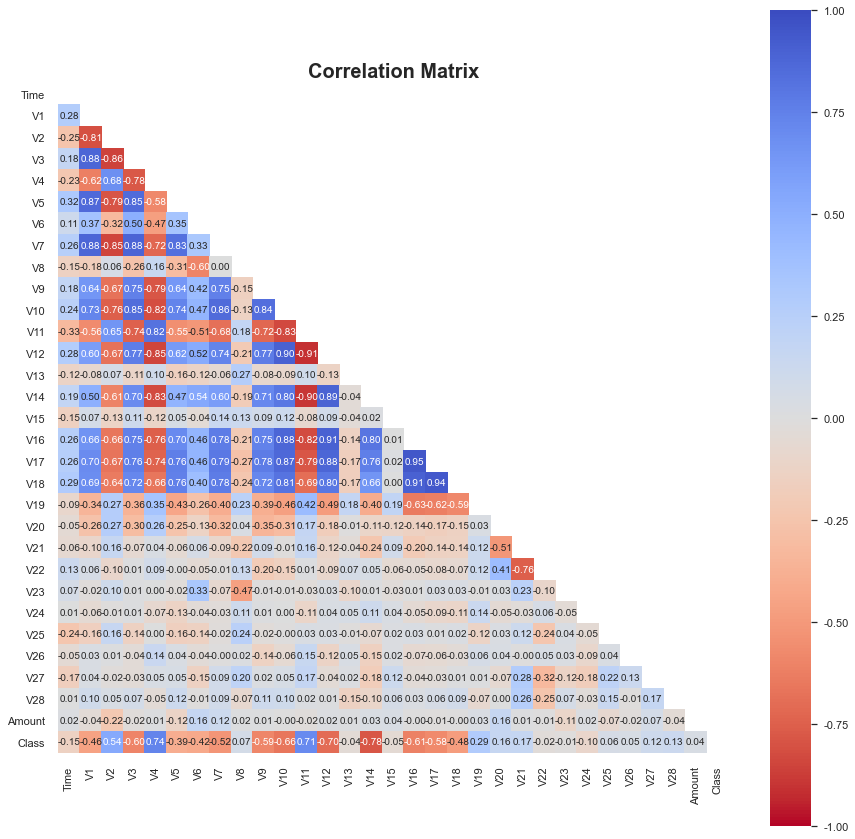

In [11]:
corr = train_o.corr()
sns.set(style='white')
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, mask=mask, cmap='coolwarm_r',vmin=-1, vmax=1,
            square=True, annot=True, fmt='.2f',  annot_kws={"size":10})
plt.title('Correlation Matrix', fontsize=20,  fontweight='bold')
plt.show()

NameError: name 'ax3' is not defined

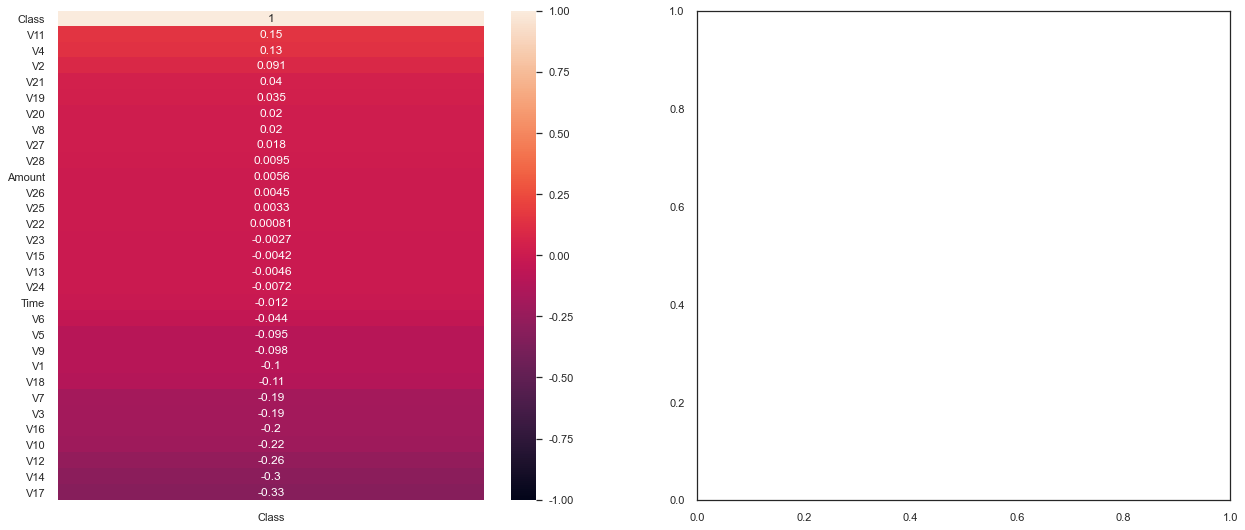

In [12]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (21,9))
sns.heatmap(df.corr()[['Class']].sort_values('Class',ascending=False), annot=True, vmin=-1, vmax=1, ax=ax1)
sns.heatmap(train_o.corr()[['Class']].sort_values('Class',ascending=False), annot=True, vmin=-1, vmax=1, ax=ax3)
ax1.set_title('기존', fontdict={'color':'w'})
ax3.set_title('OverSampling', fontdict={'color':'w'})
plt.show()

In [13]:
smote = SMOTE(random_state=1)
x_train_o, y_train_o = smote.fit_resample(x_train_new, y_train_new)

NameError: name 'x_train_new' is not defined

2️⃣3️⃣4️⃣5️⃣6️⃣7️⃣8️⃣9️⃣🔟